In [2]:
import os
os.chdir("C:\\Users\\Karan\\Desktop\\spring\\RA\\")

In [26]:
#cosine similarity using sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
cosine_similarity(
    [values_sentence_1],
    [values_sentence_2]
)

array([[0.89504236]])

In [76]:
os.chdir("C:\\Users\\Karan\\Desktop\\spring\\RA\\sentence similarity\\")

In [77]:
def load_data(file1, file2):
    with open(file1) as f:
        data1 = json.load(f)
    with open(file2) as f:
        data2 = json.load(f) 
    #getting the last token embedding
# we subtract 2 from total tokens length because last token will be [SEP] and second last token will be [.]
    last_word_token_sentence1 = len(data1['features'])-1    
    last_word_token_sentence2 = len(data2['features'])-1
    return data1, last_word_token_sentence1, data2, last_word_token_sentence2

    

In [78]:
def calculate_cosine_similarity_last_token(data1, last_token1, data2, last_token2):
    values_sentence_1 = data1['features'][last_word_token_sentence1]['layers'][0]['values']
    values_sentence_2 = data2['features'][last_word_token_sentence2]['layers'][0]['values']
    cosine_scores = util.pytorch_cos_sim(values_sentence_1, values_sentence_2)
    return cosine_scores    
    

In [79]:
def calculate_cosine_similarity_avg(data1, last_token1, data2, last_token2):
    #taking the mean of the vectors approach
    val_mean1 = []
    for i in range(0, last_token1+1):
        val_mean1.append(data1['features'][i]['layers'][0]['values'])
    val_mean2 = []
    for i in range(0, last_token2+1):
        val_mean2.append(data2['features'][i]['layers'][0]['values'])
    d1 = np.mean(val_mean1, axis = 0)
    d2 = np.mean(val_mean2, axis = 0)
    cosine_scores_mean = util.pytorch_cos_sim(d1, d2)
    return cosine_scores_mean

In [89]:
scores_last = []
scores_avg = []

In [164]:
data1, last_word_token_sentence1, data2, last_word_token_sentence2 = load_data('output_20.1.jsonl', 'output_20.2.jsonl')

In [165]:
score_last_token = calculate_cosine_similarity_last_token(data1, last_word_token_sentence1, data2, last_word_token_sentence2)
score_avg = calculate_cosine_similarity_avg(data1, last_word_token_sentence1, data2, last_word_token_sentence2)

In [166]:
scores_last.append(score_last_token)
scores_avg.append(score_avg)

In [167]:
scores_last, scores_avg

([tensor([[0.9287]]),
  tensor([[0.8310]]),
  tensor([[0.7770]]),
  tensor([[0.7344]]),
  tensor([[0.9011]]),
  tensor([[0.8944]]),
  tensor([[0.7356]]),
  tensor([[0.9002]]),
  tensor([[0.8671]]),
  tensor([[0.8351]]),
  tensor([[0.7151]]),
  tensor([[0.8330]]),
  tensor([[0.8152]]),
  tensor([[0.8309]]),
  tensor([[0.8189]]),
  tensor([[0.7810]]),
  tensor([[0.8017]]),
  tensor([[0.9268]]),
  tensor([[0.7750]])],
 [tensor([[0.9553]], dtype=torch.float64),
  tensor([[0.8948]], dtype=torch.float64),
  tensor([[0.8515]], dtype=torch.float64),
  tensor([[0.8418]], dtype=torch.float64),
  tensor([[0.9229]], dtype=torch.float64),
  tensor([[0.9166]], dtype=torch.float64),
  tensor([[0.8425]], dtype=torch.float64),
  tensor([[0.9563]], dtype=torch.float64),
  tensor([[0.9321]], dtype=torch.float64),
  tensor([[0.8726]], dtype=torch.float64),
  tensor([[0.7982]], dtype=torch.float64),
  tensor([[0.8797]], dtype=torch.float64),
  tensor([[0.8606]], dtype=torch.float64),
  tensor([[0.8930]], d

In [184]:
true_results = [3.0,3.2,0.2,1.2,3.0, 2.0,1.8,3.4,3.4 ,0.2,0.0,2.8,1.6,0.2,1.6,0.2,3.6,1.8,2.0]

In [ ]:
from sklearn import preprocessing

In [190]:
true_results = np.array(true_results).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
true_results_normalized = min_max_scaler.fit_transform(true_results)
true_results_normalized

array([[0.83333333],
       [0.88888889],
       [0.05555556],
       [0.33333333],
       [0.83333333],
       [0.55555556],
       [0.5       ],
       [0.94444444],
       [0.94444444],
       [0.05555556],
       [0.        ],
       [0.77777778],
       [0.44444444],
       [0.05555556],
       [0.44444444],
       [0.05555556],
       [1.        ],
       [0.5       ],
       [0.55555556]])

In [209]:
true_results_normalized_new = true_results_normalized_new.reshape(true_results_normalized_new.shape[0]*true_results_normalized_new.shape[1])

In [210]:
arr = np.array([scores_last, true_results_normalized_new]).T

In [199]:

true_results_normalized_new = true_results_normalized.reshape(true_results_normalized.shape[1], (true_results_normalized.shape[0]*true_results_normalized.shape[2]))

In [211]:
import numpy as np
import pandas as pd
arr = np.array([scores_last, scores_avg, true_results_normalized_new]).T
df = pd.DataFrame(arr, columns=["result_last", "result_avg", 'true_results'])
df2 = df.sort_values(by=["true_results"]).reset_index(drop = True)

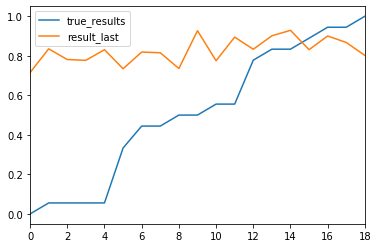

In [212]:
%matplotlib inline
df2[['true_results', 'result_last']].plot()

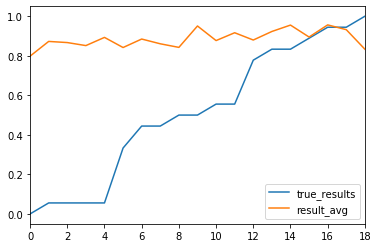

In [213]:
df2[['true_results', 'result_avg']].plot()